---

请注意选择 KAN 模型类型：
- MathGroupKAN
- MathTaylorKAN





In [1]:
import os
print(f"当前工作目录：{os.getcwd()}")
# 设置工作目录
# os.chdir('/root/lanyun-tmp/kan-things')

%reload_ext autoreload
%autoreload 2

当前工作目录：/root/lanyun-tmp/kan-things/Efficient-KAN-in-Chinese


In [2]:
from test_groupkan import train, MathGroupKAN, MathTaylorKAN, MathMLP
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

当前工作目录: /root/lanyun-tmp/kan-things/Efficient-KAN-in-Chinese


In [3]:
import numpy as np
import pandas as pd
from test_groupkan import complex_equation

np.random.seed(42)

# 生成随机输入数据 (10000个样本)
n_samples = 10000
X = np.random.randn(n_samples, 8) * 2  # 8个特征/变量，扩大取值范围



# 计算每个样本的目标值
y = np.array([complex_equation(x) for x in X])

# 转换为DataFrame便于查看
data = pd.DataFrame(X, columns=[f'x{i+1}' for i in range(8)])
data['y'] = y

# 显示前5行数据
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0.993428,-0.276529,1.295377,3.046060,-0.468307,-0.468274,3.158426,1.534869,11.931326
1,-0.938949,1.085120,-0.926835,-0.931460,0.483925,-3.826560,-3.449836,-1.124575,-1.785756
2,-2.025662,0.628495,-1.816048,-2.824607,2.931298,-0.451553,0.135056,-2.849496,-7.329987
3,-1.088765,0.221845,-2.301987,0.751396,-1.201277,-0.583387,-1.203413,3.704556,-0.439691
4,-0.026994,-2.115422,1.645090,-2.441687,0.417727,-3.919340,-2.656372,0.393722,17.903385


In [4]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
criterion = nn.MSELoss()


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mlp = MathMLP().to(device)
# kan = MathGroupKAN().to(device)
kan = MathTaylorKAN().to(device)

for model in [mlp, kan]:

    # 统计模型参数总数
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    print(f'模型名称: {model.__class__.__name__}')
    print(f'模型总参数数量: {total_params:,}')
    print(f'可训练参数数量: {trainable_params:,}\n')


模型名称: MathMLP
模型总参数数量: 10,513
可训练参数数量: 10,513

模型名称: MathTaylorKAN
模型总参数数量: 10,626
可训练参数数量: 10,626



In [6]:
for model in [mlp, kan]:
    print(f'\n训练模型: {model.__class__.__name__}')
    optimizer = optim.Adam(model.parameters(), 1e-3)
    train(model, train_loader, test_loader, criterion, optimizer, 200)


训练模型: MathMLP
Epoch [1/200], Train Loss: 151.6919, Test Loss: 134.3335, Test R2: 0.4369
Epoch [10/200], Train Loss: 14.3219, Test Loss: 16.0305, Test R2: 0.9328
Epoch [20/200], Train Loss: 4.0383, Test Loss: 7.2414, Test R2: 0.9696
Epoch [30/200], Train Loss: 1.7890, Test Loss: 4.6326, Test R2: 0.9806
Epoch [40/200], Train Loss: 1.1315, Test Loss: 3.0372, Test R2: 0.9873
Epoch [50/200], Train Loss: 0.9718, Test Loss: 2.5625, Test R2: 0.9893
Epoch [60/200], Train Loss: 0.7786, Test Loss: 2.7383, Test R2: 0.9885
Epoch [70/200], Train Loss: 0.6876, Test Loss: 2.3015, Test R2: 0.9904
Epoch [80/200], Train Loss: 0.6168, Test Loss: 2.2785, Test R2: 0.9905
Epoch [90/200], Train Loss: 0.6344, Test Loss: 2.0154, Test R2: 0.9916
Epoch [100/200], Train Loss: 0.6137, Test Loss: 1.8836, Test R2: 0.9921
Epoch [110/200], Train Loss: 0.6106, Test Loss: 1.8934, Test R2: 0.9921
Epoch [120/200], Train Loss: 0.4552, Test Loss: 1.9399, Test R2: 0.9919
Epoch [130/200], Train Loss: 0.4963, Test Loss: 1.6750

Epoch [140/200], Train Loss: 0.5577, Test Loss: 1.7865, Test R2: 0.9925
Epoch [150/200], Train Loss: 0.4511, Test Loss: 1.7367, Test R2: 0.9927
Epoch [160/200], Train Loss: 0.3938, Test Loss: 1.8537, Test R2: 0.9922
Epoch [170/200], Train Loss: 0.4117, Test Loss: 1.7159, Test R2: 0.9928
Epoch [180/200], Train Loss: 0.4245, Test Loss: 1.9009, Test R2: 0.9920
Epoch [190/200], Train Loss: 0.3781, Test Loss: 1.7836, Test R2: 0.9925
Epoch [200/200], Train Loss: 0.5758, Test Loss: 1.9038, Test R2: 0.9920

训练模型: MathTaylorKAN
Epoch [1/200], Train Loss: 112.5590, Test Loss: 71.7752, Test R2: 0.6995
Epoch [10/200], Train Loss: 5.4573, Test Loss: 5.5884, Test R2: 0.9767
Epoch [20/200], Train Loss: 3.2762, Test Loss: 2.5076, Test R2: 0.9895
Epoch [30/200], Train Loss: 2.9727, Test Loss: 2.7756, Test R2: 0.9885
Epoch [40/200], Train Loss: 3.1073, Test Loss: 2.0397, Test R2: 0.9915
Epoch [50/200], Train Loss: 1.5147, Test Loss: 2.1772, Test R2: 0.9909
Epoch [60/200], Train Loss: 1.4999, Test Loss: 

In [7]:
import torch
from torch import nn

# 加载两个模型
kan_model = MathTaylorKAN().to(device)
kan_model.load_state_dict(torch.load('best_MathTaylorKAN_model.pth')['model_state_dict'])
kan_model.eval()

mlp_model = MathMLP().to(device) 
mlp_model.load_state_dict(torch.load('best_MathMLP_model.pth')['model_state_dict'])
mlp_model.eval()


MathMLP(
  (layers): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=72, bias=True)
    (3): ReLU()
    (4): Linear(in_features=72, out_features=1, bias=True)
  )
)

In [8]:
# 生成5个测试数据
test_X = np.random.randn(5, 8) * 2
test_X_df = pd.DataFrame(test_X, columns=[f'x{i+1}' for i in range(8)])

# 计算测试集目标值
test_y = np.array([complex_equation(x) for x in test_X])

# 转换为tensor
test_X_tensor = torch.tensor(test_X, dtype=torch.float32).to(device)
test_y_tensor = torch.tensor(test_y, dtype=torch.float32).reshape(-1, 1).to(device)


# 预测
with torch.no_grad():
    kan_pred = kan_model(test_X_tensor)
    mlp_pred = mlp_model(test_X_tensor)

# 计算差值并展示结果
results = pd.DataFrame({
    '真实值': test_y,
    'KAN预测': kan_pred.cpu().numpy().flatten(),
    'MLP预测': mlp_pred.cpu().numpy().flatten(),
    'KAN差值': np.abs(test_y - kan_pred.cpu().numpy().flatten()),
    'MLP差值': np.abs(test_y - mlp_pred.cpu().numpy().flatten())
})

print("预测结果对比:")
results


预测结果对比:


,真实值,KAN预测,MLP预测,KAN差值,MLP差值
0,2.257609,1.883026,1.728362,0.374583,0.529247
1,46.717404,44.255013,44.746269,2.462392,1.971135
2,-2.223511,-1.820091,-1.639774,0.403421,0.583737
3,1.415457,1.488309,1.168971,0.072852,0.246486
4,13.165353,12.832372,13.728106,0.332981,0.562753


在1000个测试样本中:
KAN表现更好的样本数: 606 (60.60%)
MLP表现更好的样本数: 394 (39.40%)
两者表现相同的样本数: 0 (0.00%)

平均绝对误差比较:
KAN平均绝对误差: 0.578058
MLP平均绝对误差: 0.725372
误差比例 (KAN/MLP): 0.7969


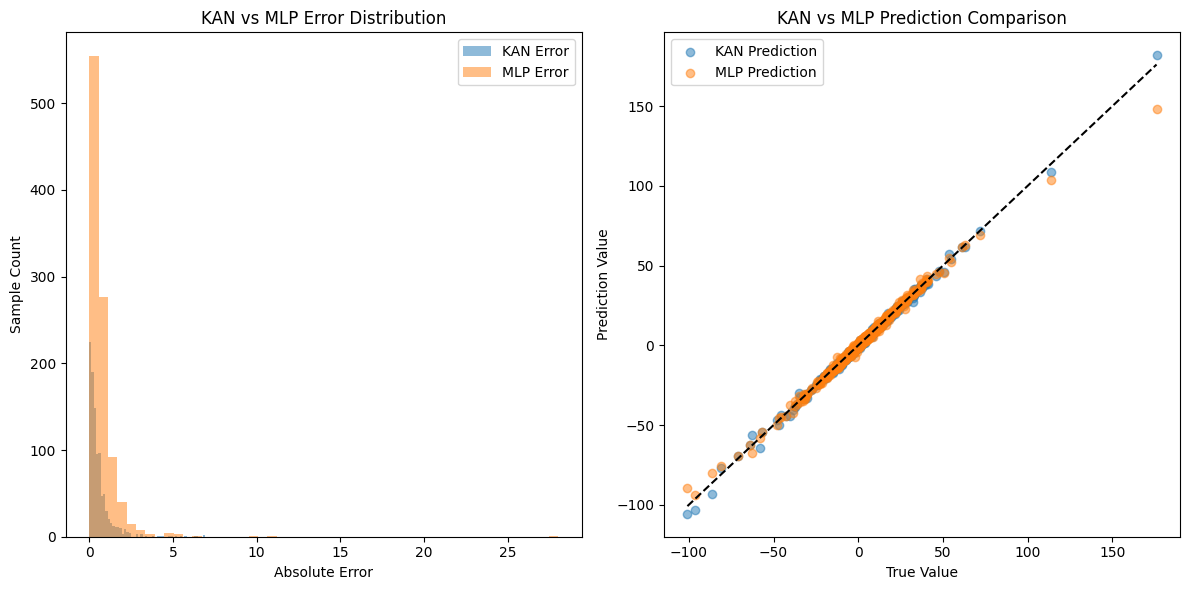

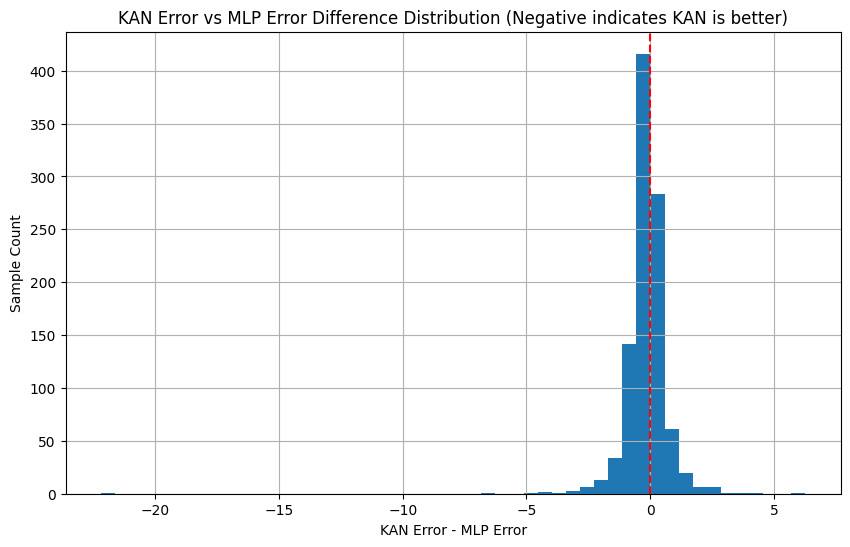

In [9]:
import matplotlib.pyplot as plt

# 生成1000个测试数据
n_test = 1000
test_X = np.random.randn(n_test, 8) * 2

# 计算测试集目标值
test_y = np.array([complex_equation(x) for x in test_X])


# 转换为tensor
test_X_tensor = torch.tensor(test_X, dtype=torch.float32).to(device)
test_y_tensor = torch.tensor(test_y, dtype=torch.float32).reshape(-1, 1).to(device)

# 预测
with torch.no_grad():
    kan_pred = kan_model(test_X_tensor).cpu().numpy().flatten()
    mlp_pred = mlp_model(test_X_tensor).cpu().numpy().flatten()

# 计算每个样本的绝对误差
kan_errors = np.abs(test_y - kan_pred)
mlp_errors = np.abs(test_y - mlp_pred)

# 计算每个样本哪个模型更好
kan_better = kan_errors < mlp_errors
mlp_better = mlp_errors < kan_errors
equal_performance = np.isclose(kan_errors, mlp_errors)

# 统计各模型优势样本数
kan_better_count = np.sum(kan_better)
mlp_better_count = np.sum(mlp_better)
equal_count = np.sum(equal_performance)

# 计算平均绝对误差
kan_mae = np.mean(kan_errors)
mlp_mae = np.mean(mlp_errors)

# 打印结果
print(f"在{n_test}个测试样本中:")
print(f"KAN表现更好的样本数: {kan_better_count} ({kan_better_count/n_test*100:.2f}%)")
print(f"MLP表现更好的样本数: {mlp_better_count} ({mlp_better_count/n_test*100:.2f}%)")
print(f"两者表现相同的样本数: {equal_count} ({equal_count/n_test*100:.2f}%)")
print("\n平均绝对误差比较:")
print(f"KAN平均绝对误差: {kan_mae:.6f}")
print(f"MLP平均绝对误差: {mlp_mae:.6f}")
print(f"误差比例 (KAN/MLP): {kan_mae/mlp_mae:.4f}")

# 可视化误差分布
plt.figure(figsize=(12, 6))

# 误差比较直方图
plt.subplot(1, 2, 1)
plt.hist(kan_errors, alpha=0.5, bins=50, label='KAN Error')
plt.hist(mlp_errors, alpha=0.5, bins=50, label='MLP Error')
plt.legend()
plt.title('KAN vs MLP Error Distribution')
plt.xlabel('Absolute Error')
plt.ylabel('Sample Count')

# 散点图比较
plt.subplot(1, 2, 2)
plt.scatter(test_y, kan_pred, alpha=0.5, label='KAN Prediction')
plt.scatter(test_y, mlp_pred, alpha=0.5, label='MLP Prediction')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'k--')
plt.legend()
plt.title('KAN vs MLP Prediction Comparison')
plt.xlabel('True Value')
plt.ylabel('Prediction Value')

plt.tight_layout()
plt.show()

# 计算两种模型的相对误差表现
error_diff = kan_errors - mlp_errors
plt.figure(figsize=(10, 6))
plt.hist(error_diff, bins=50)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('KAN Error vs MLP Error Difference Distribution (Negative indicates KAN is better)')
plt.xlabel('KAN Error - MLP Error')
plt.ylabel('Sample Count')
plt.grid(True)
plt.show()